Julia Warner

CAP 4630

HW2, Problem 2

In [0]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

## Import the MNIST fashion dataset

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


## Pre-process the dataset

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Model that underfits

In [0]:
#set up the layers
model_underfit = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(5, activation=tf.nn.relu),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
#compile the model
model_underfit.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [0]:
#train the model
epochs_underfit = 20
history_underfit = model_underfit.fit(train_images, 
                      train_labels, 
                      epochs=epochs_underfit,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 66us/sample - loss: 1.2308 - acc: 0.5613 - val_loss: 0.8091 - val_acc: 0.7207
Epoch 2/20
60000/60000 [==============================] - 3s 57us/sample - loss: 0.6864 - acc: 0.7485 - val_loss: 0.6669 - val_acc: 0.7475
Epoch 3/20
60000/60000 [==============================] - 3s 57us/sample - loss: 0.6288 - acc: 0.7631 - val_loss: 0.6468 - val_acc: 0.7537
Epoch 4/20
60000/60000 [==============================] - 3s 58us/sample - loss: 0.6063 - acc: 0.7720 - val_loss: 0.6308 - val_acc: 0.7580
Epoch 5/20
60000/60000 [==============================] - 3s 58us/sample - loss: 0.5934 - acc: 0.7764 - val_loss: 0.6202 - val_acc: 0.7692
Epoch 6/20
60000/60000 [==============================] - 5s 82us/sample - loss: 0.5832 - acc: 0.7812 - val_loss: 0.6129 - val_acc: 0.7735
Epoch 7/20
60000/60000 [==============================] - 5s 91us/sample - loss: 0.5749 - acc: 0.7853 - val_loss: 0.

In [0]:
#get the training history
history_dict_underfit = history_underfit.history
acc_values_underfit = history_dict_underfit['acc']
test_acc_values_underfit = history_dict_underfit['val_acc']
loss_values_underfit = history_dict_underfit['loss']
test_loss_values_underfit = history_dict_underfit['val_loss']
epochs_range_underfit = range(1, epochs_underfit+1)

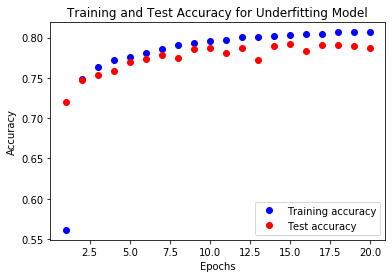

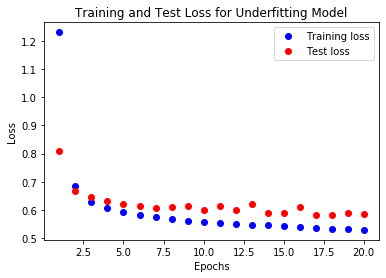

In [0]:
#visualize the results

#accuracy
plt.plot(epochs_range_underfit, acc_values_underfit, 'bo', label='Training accuracy')
plt.plot(epochs_range_underfit, test_acc_values_underfit, 'ro', label='Test accuracy')
plt.title('Training and Test Accuracy for Underfitting Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#loss
plt.plot(epochs_range_underfit, loss_values_underfit, 'bo', label='Training loss')
plt.plot(epochs_range_underfit, test_loss_values_underfit, 'ro', label='Test loss')
plt.title('Training and Test Loss for Underfitting Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

After the initial increase in accuracy, accuracy stops improving by any meaningful amount for both the testing and the training datasets. Additionally, the model stagnates at about 80% accuracy, which is fairly low. These are both signs of a model that underfits. This model underfits because the layers with only 4 and 5 nodes oversimplify the input data.

## Model that overfits

In [0]:
#set up the layers
model_overfit = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation=tf.nn.relu),
    keras.layers.Dense(100, activation=tf.nn.relu),
    keras.layers.Dense(200, activation=tf.nn.relu),
    keras.layers.Dense(100, activation=tf.nn.relu),
    keras.layers.Dense(100, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
#compile the model
model_overfit.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [0]:
#train the model
epochs_overfit = 30
history_overfit = model_overfit.fit(train_images, 
                      train_labels, 
                      epochs=epochs_overfit,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 8s 127us/sample - loss: 0.5143 - acc: 0.8120 - val_loss: 0.4709 - val_acc: 0.8314
Epoch 2/30
60000/60000 [==============================] - 7s 122us/sample - loss: 0.3837 - acc: 0.8588 - val_loss: 0.4132 - val_acc: 0.8503
Epoch 3/30
60000/60000 [==============================] - 8s 126us/sample - loss: 0.3499 - acc: 0.8702 - val_loss: 0.3895 - val_acc: 0.8561
Epoch 4/30
60000/60000 [==============================] - 7s 124us/sample - loss: 0.3234 - acc: 0.8806 - val_loss: 0.3886 - val_acc: 0.8596
Epoch 5/30
60000/60000 [==============================] - 7s 121us/sample - loss: 0.3102 - acc: 0.8854 - val_loss: 0.3550 - val_acc: 0.8723
Epoch 6/30
60000/60000 [==============================] - 7s 123us/sample - loss: 0.2979 - acc: 0.8910 - val_loss: 0.3405 - val_acc: 0.8764
Epoch 7/30
60000/60000 [==============================] - 7s 121us/sample - loss: 0.2828 - acc: 0.8949 - val_l

In [0]:
#get the training history
history_dict_overfit = history_overfit.history
acc_values_overfit = history_dict_overfit['acc']
test_acc_values_overfit = history_dict_overfit['val_acc']
loss_values_overfit = history_dict_overfit['loss']
test_loss_values_overfit = history_dict_overfit['val_loss']
epochs_range_overfit = range(1, epochs_overfit+1)

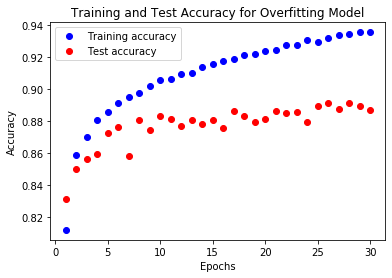

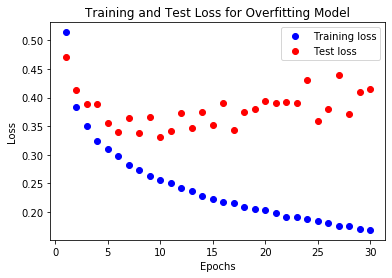

In [0]:
#visualize the results

#accuracy
plt.plot(epochs_range_overfit, acc_values_overfit, 'bo', label='Training accuracy')
plt.plot(epochs_range_overfit, test_acc_values_overfit, 'ro', label='Test accuracy')
plt.title('Training and Test Accuracy for Overfitting Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#loss
plt.plot(epochs_range_overfit, loss_values_overfit, 'bo', label='Training loss')
plt.plot(epochs_range_overfit, test_loss_values_overfit, 'ro', label='Test loss')
plt.title('Training and Test Loss for Overfitting Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

You can tell this models overfits because the training accuracy continues to increase as the testing accuracy remains about the same. The overfitting is due to the model being too complex and training for too long. It is essentially memorizing the training data and loosing it's ability to abstract to other images. 

## Model that is "pretty good"

In [0]:
#set up the layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
#compile the model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [0]:
#train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 168us/sample - loss: 0.5240 - acc: 0.8092 - val_loss: 0.4395 - val_acc: 0.8337
Epoch 2/20
60000/60000 [==============================] - 11s 176us/sample - loss: 0.4043 - acc: 0.8524 - val_loss: 0.3965 - val_acc: 0.8553
Epoch 3/20
60000/60000 [==============================] - 9s 158us/sample - loss: 0.3676 - acc: 0.8632 - val_loss: 0.3833 - val_acc: 0.8605
Epoch 4/20
60000/60000 [==============================] - 10s 161us/sample - loss: 0.3488 - acc: 0.8697 - val_loss: 0.3866 - val_acc: 0.8615
Epoch 5/20
60000/60000 [==============================] - 9s 158us/sample - loss: 0.3338 - acc: 0.8761 - val_loss: 0.3593 - val_acc: 0.8722
Epoch 6/20
60000/60000 [==============================] - 9s 158us/sample - loss: 0.3194 - acc: 0.8818 - val_loss: 0.3504 - val_acc: 0.8730
Epoch 7/20
60000/60000 [==============================] - 10s 161us/sample - loss: 0.3119 - acc: 0.8837 - v

In [0]:
#get the training history
history_dict = history.history
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

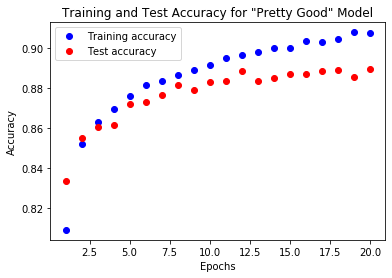

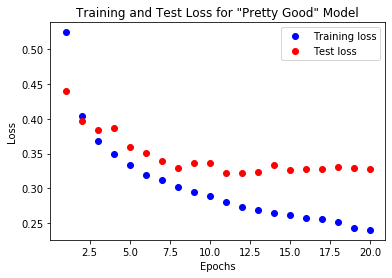

In [0]:
#visualize the results

#accuracy
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and Test Accuracy for "Pretty Good" Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#loss
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and Test Loss for "Pretty Good" Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

A model that acheives 89% accuracy on the training data could be considered pretty good. There is a slight overfit, as the training loss continues to decrease while the test loss remains the same, but the gap is much less pronounced than in the overfitting example. Dropout was used to prevent overfitting, and large layers were used to prevent oversimplification/underfitting. 